In [20]:
import librosa
import librosa.display
from os import listdir,scandir
from os.path import isfile, join
from scipy.fft import *
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from collections import Counter

# Loading data
 Loading the TESS dataset, ploting info and extracting features

In [2]:
waves = []
target = []
actors_dir = 'speech_data'
for it in scandir(actors_dir):
    if it.is_dir():
        wavefiles = [f for f in listdir(it.path) if isfile(join(it.path, f))]
        for i in range(len(wavefiles)):
            wavefiles[i] = it.path +"/"+ wavefiles[i]
            emotion = it.path[16:]
            target.append(emotion)
        waves += wavefiles

In [9]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(target)

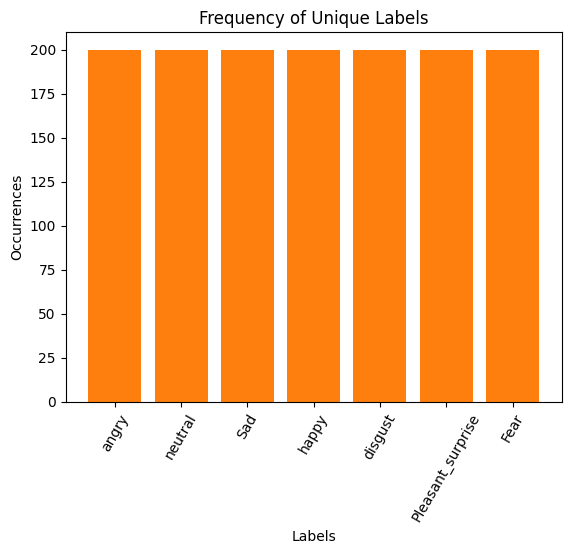

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [10]:
# Count the occurrences of each unique label
label_counts = Counter(target)

# Extract the unique labels and their corresponding counts
unique_labels = list(label_counts.keys())
label_occurrences = list(label_counts.values())

# Plot the bar chart
plt.bar(unique_labels, label_occurrences)
plt.xlabel("Labels")
plt.ylabel("Occurrences")
plt.title("Frequency of Unique Labels")
plt.xticks(rotation=60)
plt.show()

In [11]:
# Function to extract features from an audio file
def extract_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract energy
    energy = np.sum(np.abs(y) ** 2)

    # Extract zero-crossing rate
    zero_crossings = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate = np.mean(zero_crossings)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    return [energy, zero_crossing_rate] + mfccs.mean(axis=1).tolist()

In [12]:

audio_files = waves
labels = labels_encoded 

features_list = []
labels_list = []

# Extract features for each audio file and store them in the features_list
for audio_file, label in zip(audio_files, labels):
    features = extract_features(audio_file)
    features_list.append(features)
    labels_list.append(label)

# Convert the lists to numpy arrays
X = np.array(features_list)
y = np.array(labels_list)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Fiting

In [13]:
#  Create a KNN classifier and train it on the training data
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Create a SVC classifier and train it on the training data
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Neural Network (Multi-layer Perceptron)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)
mlp_classifier.fit(X_train, y_train)

# Eval

In [22]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.925
Confusion Matrix:
[[29  0  0  1  0  2  0]
 [ 1 36  0  0  1  2  0]
 [ 0  0 41  0  0  0  1]
 [ 1  2  0 31  1  0  0]
 [ 0  1  0  1 42  2  0]
 [ 1  2  0  0  0 40  0]
 [ 1  0  1  0  0  0 40]]
Precision: 0.9245916432706313
Recall: 0.9234016786694454
F1 Score: 0.9236024175405532
